# Teachable Machine

source:https://teachablemachine.withgoogle.com/

In [71]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('schaar.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print("prediction = "+str(prediction))

prediction = [[0.09291524 0.0715576  0.8355271 ]]


## Data inspection

In [16]:
type(prediction)

numpy.ndarray

In [18]:
prediction.dtype

dtype('float32')

In [19]:
prediction.shape

(1, 3)

## Define variables based on results, sort the list of variables, return highest value

In [72]:
papier = ["papier", prediction[0,0]]
steen  = ["steen", prediction[0,1]]
schaar = ["schaar",prediction[0,2]]
lijst = [papier,steen, schaar]
lijst.sort(key=lambda x: x[1], reverse=True)
print(lijst)
hoogste = lijst[0]
hoogste_class = hoogste[0]
hoogste_class

[['schaar', 0.8355271], ['papier', 0.09291524], ['steen', 0.071557604]]


'schaar'

# Other stuff, possibly to be removed

In [23]:
# create array with class names
class_names = np.array(["steen", "papier", "schaar"])
print(class_names)

['steen' 'papier' 'schaar']


In [25]:
class_names.shape

(3,)

In [26]:
b = np.append(class_names, prediction)
b

array(['steen', 'papier', 'schaar', '0.09291524', '0.071557604',
       '0.8355271'], dtype='<U32')

In [27]:
b.shape

(6,)

## Face  mask detector


In [28]:
import cv2
video_capture = cv2.VideoCapture(0)
# Check success
if not video_capture.isOpened():
    raise Exception("Could not open video device")
# Read picture. ret === True on success
ret, frame = video_capture.read()

cv2.imshow('frame', frame)
# Close device
video_capture.release()

cv2.destroyAllWindows()

<IPython.core.display.Javascript object>


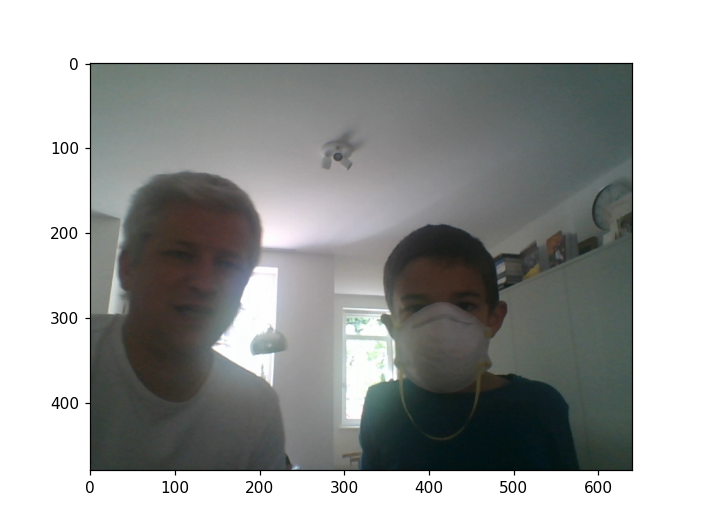

True

In [29]:
%matplotlib notebook
import sys
from matplotlib import pyplot as plt
frameRGB = frame[:,:,::-1] # BGR => RGB
plt.imshow(frameRGB)
cv2.imwrite('opencv_face.png', frameRGB)


In [30]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('opencv_face.png')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

[[0.2374011  0.76259893]]


In [31]:
# turn the prediction into a human readable result
no_mask = ["No Mask", prediction[0,0]]
mask  = ["Mask", prediction[0,1]]

lijst = [no_mask, mask]
lijst.sort(key=lambda x: x[1], reverse=True)
print(lijst)
hoogste = lijst[0]
hoogste_class = hoogste[0]
hoogste_class

[['Mask', 0.76259893], ['No Mask', 0.2374011]]


'Mask'

In [32]:
if hoogste_class == "Mask":
    print("turn green led on")
elif hoogste_class == 'No Mask':
    print("turn red led on")

turn green led on
